In [1]:
import urllib.request as req
import json
import pandas as pd
import numpy as np

url= "https://www.ptt.cc/bbs/basketballTW/M.1656483423.A.17A.html"

request=req.Request(url, headers={
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"
})

with req.urlopen(request) as response:
    data=response.read().decode("utf-8")
    

In [2]:
import bs4
root=bs4.BeautifulSoup(data, "html.parser")
articles = root.find_all('div', 'push')
for article in articles:
    messages = article.find('span', 'f3 push-content').getText()
    
temp = []
for article in articles:
    messages = article.find('span', 'f3 push-content').getText()
    temp.append(messages)
    
df = pd.DataFrame(temp)
df

,0
0,: 進場看球人數差這麼多，還在幫黑喔 06/29 14:18
1,: 鋼鐵人的吉祥物是牛，啦啦隊是雅典娜==？
2,: 樓下benny表示
3,: 原來吉祥物是牛 還真想不到
4,: 為了反對而反對
...,...
282,: 推這篇，樓主說得有理，我挺p+就是不挺港鐵人
283,: 海神行銷還能捧喔
284,: 不太認同
285,: 鋼鐵人YT確實欠個好片師，但拿隊名戰滿可笑的


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
#匯入jieba功能
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [5]:
#測試
documents = ["高雄鋼鐵人輸到快哭出來啦老闆"]

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\wish9\AppData\Local\Temp\jieba.cache
Loading model cost 0.740 seconds.
Prefix dict has been built successfully.


高雄/鋼鐵人/輸到/快/哭/出來/啦/老/闆


In [6]:
df['seg'] = " "
index = 0
for documents in df[0]:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    seg_list = jieba.lcut(documents)
    df['seg'].iloc[index] = seg_list
    index += 1
df['seg']

0      [:,  , 進場, 看球, 人數, 差, 這麼, 多, ，, 還在, 幫, 黑, 喔,  ...
1      [:,  , 鋼鐵人, 的, 吉祥物, 是, 牛, ，, 啦, 啦, 隊, 是, 雅典娜, ...
2                                  [:,  , 樓下, benny, 表示]
3                      [:,  , 原來, 吉祥物, 是, 牛,  , 還真, 想不到]
4                            [:,  , 為, 了, 反, 對, 而, 反, 對]
                             ...                        
282    [:,  , 推, 這篇, ，, 樓主說, 得, 有理, ，, 我, 挺, p, +, 就是...
283                             [:,  , 海神, 行銷, 還能, 捧, 喔]
284                                       [:,  , 不太, 認同]
285    [:,  , 鋼鐵人, YT, 確實, 欠個, 好, 片師, ，, 但拿隊, 名戰滿, 可笑...
286                        [:,  , 難道, 海神, 股東, 有, 波賽, 頓膩]
Name: seg, Length: 287, dtype: object

In [7]:
DICT = df['seg'].to_list()
print(DICT)

[[':', ' ', '進場', '看球', '人數', '差', '這麼', '多', '，', '還在', '幫', '黑', '喔', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '06', '/', '29', ' ', '14', ':', '18'], [':', ' ', '鋼鐵人', '的', '吉祥物', '是', '牛', '，', '啦', '啦', '隊', '是', '雅典娜', '=', '=', '？'], [':', ' ', '樓下', 'benny', '表示'], [':', ' ', '原來', '吉祥物', '是', '牛', ' ', '還真', '想不到'], [':', ' ', '為', '了', '反', '對', '而', '反', '對'], [':', ' ', '其實', '很多', '東西', '都', '很', '主觀', '吧', ' ', '有人', '就', '覺得', '牛', '很', '可愛啊'], [':', ' ', '其實', '我', '覺得', '鋼鐵人', '在', '改組', '之', '後', '修正', '的', '還不錯', '，', '只是', '前', '半'], [':', ' ', '季', '真的', '亂', '搞', '，', '而且', '很', '不', '透明'], [':', ' ', '很多', '點', ' ', '立場', '互換', '一下', ' ', '就', '都', '可以', '反過', '來講', 'XD'], [':', ' ', '很多', '謎', '之', '操作前', '團隊', '貢獻', '不少', 'XDD'], [':', ' ', '不喜歡', ' ', '什麼', '都', '可以', '是', '缺點'], [':', ' ', '後', '面比', '較', '像', '個', '樣子'], [':', ' ', '只覺', '得', '創隊', '股東蠻', '可憐', '的', ' ', '根本', '被當', '工具', '人'], [':', ' ', '海神'

In [8]:
#統整
List = []
for i in range(0,210):
  for value in DICT[i]:
    List.append(value)

In [14]:
#去除非必要的字
valueToBeRemoved = '都''很''可以''所以''也''都' 

List = [value for value in List if value != valueToBeRemoved]

results = pd.value_counts(List)
results

       468
:      219
的       80
，       63
是       49
      ... 
初年       1
整個       1
臺        1
灣農業      1
大義哦      1
Length: 963, dtype: int64

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

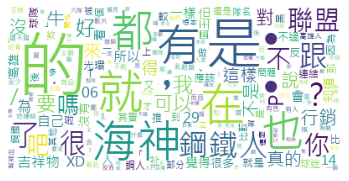

<Figure size 400x200 with 0 Axes>

In [17]:
stopwords = {"","是""了""吧""有",'\n'}
wc = WordCloud(font_path= "C:\Windows\Fonts\msjh.ttc", 
               background_color="white", 
               max_words = 200 ,
               stopwords = stopwords)      

wc.generate_from_frequencies(results)
 
#產生文字雲
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,10), dpi =20)
plt.show()